In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
fileName = "2.0_Horse-Colic-Dataset.data"
column_names = ['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 
                'temp_extremities', 'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time', 
                'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube', 'nasogastric_reflux', 
                'nasogastric_reflux_ph', 'rectal_examination', 'abdomen', 'packed_cell_volume', 
                'total_protein', 'abdominocentesis_appearance', 'abdominocentesis_total_protein', 
                'outcome', 'surgical_lesion', 'lesion_type_1', 'lesion_type_2', 'lesion_type_3', 'cp_data']

data = pd.read_csv(fileName, names=column_names, na_values='?', delim_whitespace=True)

# Selecting a subset of columns for regression (predicting 'pulse' as a continuous target)
data = data[['surgery', 'age', 'rectal_temp', 'pulse', 'pain', 'total_protein', 'outcome']]

In [5]:
data.head()

,surgery,age,rectal_temp,pulse,pain,total_protein,outcome
0,2.0,1,38.5,66.0,5.0,8.4,2.0
1,1.0,1,39.2,88.0,3.0,85.0,3.0
2,2.0,1,38.3,40.0,3.0,6.7,1.0
3,1.0,9,39.1,164.0,2.0,7.2,2.0
4,2.0,1,37.3,104.0,NaN,7.4,2.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   surgery        299 non-null    float64
 1   age            300 non-null    int64  
 2   rectal_temp    240 non-null    float64
 3   pulse          276 non-null    float64
 4   pain           245 non-null    float64
 5   total_protein  267 non-null    float64
 6   outcome        299 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 16.5 KB


In [7]:
data.describe()

,surgery,age,rectal_temp,pulse,pain,total_protein,outcome
count,299.000000,300.000000,240.000000,276.000000,245.00000,267.000000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,2.95102,24.456929,1.551839
std,0.490305,2.173972,0.732289,28.630557,1.30794,27.475009,0.737187
min,1.000000,1.000000,35.400000,30.000000,1.00000,3.300000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,2.00000,6.500000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,3.00000,7.500000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,4.00000,57.000000,2.000000
max,2.000000,9.000000,40.800000,184.000000,5.00000,89.000000,3.000000


In [11]:
print("Missing values before handling:")
print(data.isnull().sum())

# Handle
data['rectal_temp'].fillna(data['rectal_temp'].mean(), inplace=True)  # Numeric: mean
data['total_protein'].fillna(data['total_protein'].mean(), inplace=True)  # Numeric: mean
data['pain'].fillna(data['pain'].mode()[0], inplace=True)  # Categorical: mode
data['surgery'].fillna(data['surgery'].mode()[0], inplace=True)  # Categorical: mode
data['outcome'].fillna(data['outcome'].mode()[0], inplace=True)  # Categorical: mode

# Dropping rows where target variable 'pulse' is missing
data.dropna(subset=['pulse'], inplace=True)

print("\nMissing values after handling:")
print(data.isnull().sum())

Missing values before handling:
surgery           1
age               0
rectal_temp       0
pulse            24
pain              0
total_protein     0
outcome           1
dtype: int64

Missing values after handling:
surgery          0
age              0
rectal_temp      0
pulse            0
pain             0
total_protein    0
outcome          0
dtype: int64


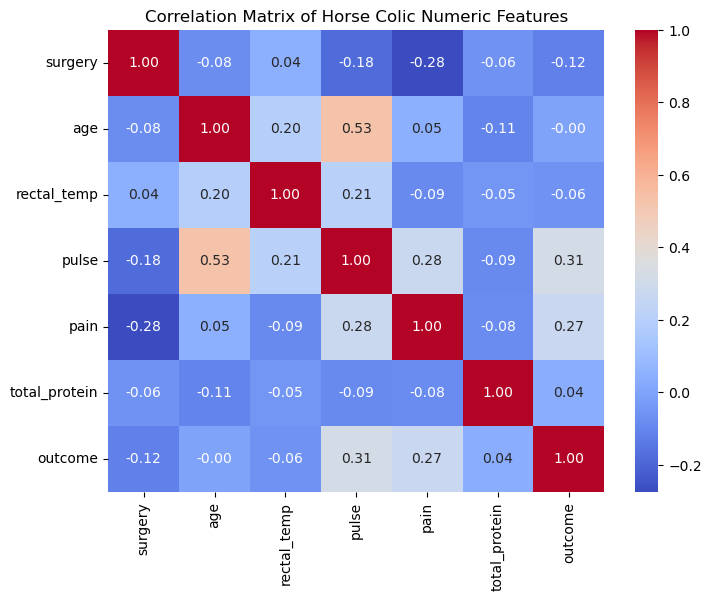

In [12]:
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Horse Colic Numeric Features')
plt.show()

### Converting categorical variables to dummy variables

In [13]:
categorical_columns = ['surgery', 'age', 'pain', 'outcome']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

## Simple Linear Regression

Simple Linear Regression Results:
R2 Score: -0.15859429824797933
Mean Squared Error: 701.4575437946484


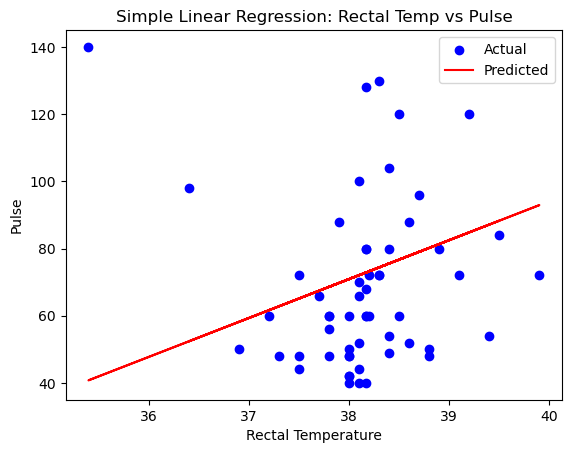

In [14]:
# Using 'rectal_temp' to predict 'pulse'
X_simple = data[['rectal_temp']]
y = data['pulse']

# Split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train
simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

# Predict
y_pred_s = simple_model.predict(X_test_s)

# Evaluate
print('Simple Linear Regression Results:')
print('R2 Score:', r2_score(y_test_s, y_pred_s))
print('Mean Squared Error:', mean_squared_error(y_test_s, y_pred_s))

# Visualize
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted')
plt.xlabel('Rectal Temperature')
plt.ylabel('Pulse')
plt.title('Simple Linear Regression: Rectal Temp vs Pulse')
plt.legend()
plt.show()

## Multiple Linear Regression

In [15]:
# Using all features to predict 'pulse'
X_multi = data.drop('pulse', axis=1)
y = data['pulse']

# Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Train
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# Predict
y_pred_m = multi_model.predict(X_test_m)

# Evaluate
print('Multiple Linear Regression Results:')
print('R2 Score:', r2_score(y_test_m, y_pred_m))
print('Mean Squared Error:', mean_squared_error(y_test_m, y_pred_m))

Multiple Linear Regression Results:
R2 Score: 0.3411719667556211
Mean Squared Error: 398.879827633803


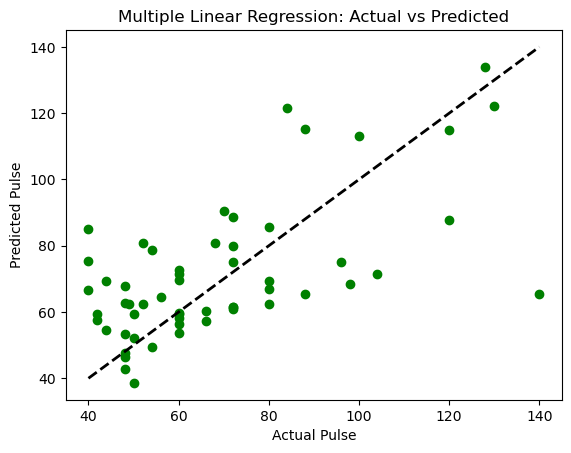

In [16]:
# Visualize
plt.scatter(y_test_m, y_pred_m, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.xlabel('Actual Pulse')
plt.ylabel('Predicted Pulse')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()